# The Infant Health Development Program (IHDP) dataset was collected to investigate the treatment effect (outcome) on children.                                               

## Import Necessary Libraries

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import seaborn as sns # for visualization
from sklearn.model_selection import GridSearchCV  # for hyperparameters tuning
from sklearn.model_selection import cross_val_score # for cross-validation evaluation
from sklearn.metrics import mean_squared_error # to calculate the RMSE
from joblib import dump # to save a model to disk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dense
# Plot the same data on a graph
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Section 1: Data Pre-Processing.                                                  

### 1.1 Loading dataset

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
col =  ["outcome", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x"+str(i))
df.columns = col
df = df.astype({"outcome":'bool'}, copy=False)
# df["outcome"] = df["outcome"].fillna(False).astype(bool).astype(int)
df.head()

,outcome,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


In [3]:
df.shape

(746, 30)

In [4]:
## check null values in the dataset
df.isna().sum()

outcome       0
y_factual     0
y_cfactual    0
mu0           0
mu1           0
x1            0
x2            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
x24           0
x25           0
dtype: int64

In [5]:
## Observe data distribution
df.describe()

,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,x6,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,3.156266,5.697953,2.431393,6.448036,0.000709,0.000460,-0.001513,-0.000217,0.000424,-0.001736,...,0.959786,0.593834,0.963807,0.134048,0.135389,0.156836,0.081769,0.073727,0.128686,0.158177
std,2.179583,1.980806,1.282009,0.454828,1.000483,1.000592,0.999815,1.000653,1.000604,0.999544,...,0.196594,0.491446,0.186895,0.340933,0.342368,0.363890,0.274197,0.261501,0.335077,0.365152
min,-1.543902,-1.037628,0.924453,5.591647,-2.731287,-3.800823,-1.850350,-0.879606,-5.130428,-1.851480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.626082,5.055072,1.518409,6.087863,-0.672350,-0.602710,-0.733261,-0.879606,-0.566672,-0.857787,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.576742,6.210211,2.114661,6.419095,0.165275,0.196818,-0.360898,0.161703,0.121017,-0.029709,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.486587,6.948987,2.982222,6.762860,0.813759,0.596582,0.756191,0.161703,0.683672,0.632754,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.268228,10.171004,9.821792,7.954804,1.505476,2.595403,2.990369,2.244320,2.371637,2.951372,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.2 Outliers identification and Removal

array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'x2'}>],
       [<Axes: title={'center': 'x3'}>, <Axes: title={'center': 'x4'}>],
       [<Axes: title={'center': 'x5'}>, <Axes: title={'center': 'x6'}>]],
      dtype=object)

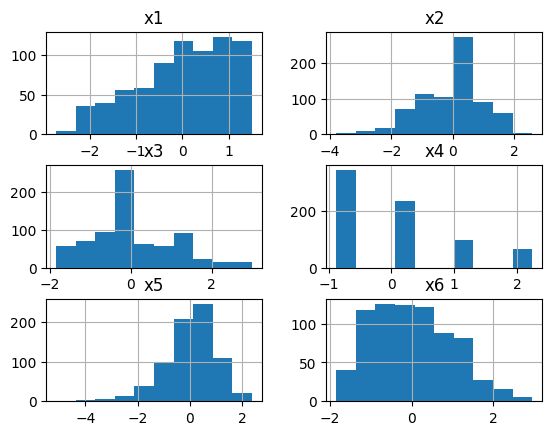

In [6]:
## Only select the numerical attributes (x1-x6) to identify outliers
dt_num = df[['x1','x2','x3', 'x4', 'x5', 'x6']]
dt_num.hist()

#### Commment 1: From the histogram distribution, we can see that attribiute 'x2' and 'x3' has uneven distribution. To further investigate, we will draw box plots and identify where is the outliers lies.

### Boxplot to identify outliers more precisely

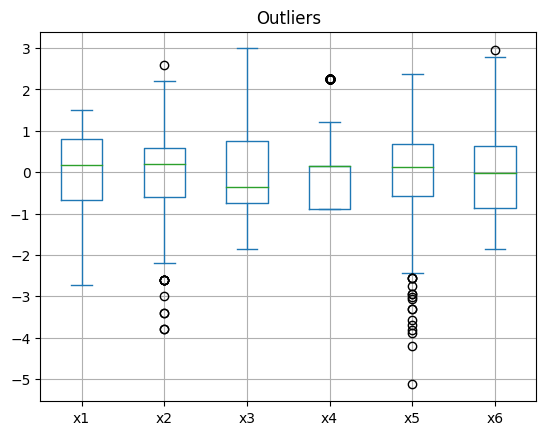

In [7]:
# Pandas dataframe
outliers = pd.DataFrame({"x1": df['x1'], "x2": df['x2'], "x3": df['x3'], "x4": df['x4'], "x5": df['x5'], "x6": df['x6']})

# Plot the dataframe
ax = outliers[['x1', 'x2','x3', 'x4','x5', 'x6']].plot(kind='box', title='boxplot',grid=True)

# Display the plot
plt.title('Outliers')
plt.show()

#### Comment 2: The boxplots for attributes x2, x4, x5 & x6 have outliers. 

### Outlier Removal

We used Inner Quertile Range (IQR) to remove outliers among outher outlier removal mechanism. We know that IQR is the distance between the upper and lower quartiles. To minimize number of outliers we will increase the range of data by using the formula  1.5 * IQR rule to remove outliers.

In [8]:
# Function to compute the lower range and upper range of values to keep (1.5 x IQR)
def range_keep(column):
    sorted(column)
    Q1,Q3 = np.percentile(column , [25,75]) # 25th to 75th percentile (interquartile range)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [9]:
# Compute the lower range and upper range for column 'x2'
lower_range, upper_range = range_keep(dt_num['x2'])
print(lower_range, upper_range)
# Keep only values that lie between that range
df = df.drop(df[(df['x2'] > upper_range) | (df['x2'] < lower_range)].index)

df.shape

-2.4016482941422486 2.3955204746270993


(733, 30)

In [10]:
# Compute the lower range and upper range for column 'x5'
lower_range, upper_range = range_keep(df['x5'])
print(lower_range, upper_range)

# Keep only values that lie between that range
df = df.drop(df[(df['x5'] > upper_range) | (df['x5'] < lower_range)].index)

df.shape

-2.2858950564351455 2.4654123243082986


(714, 30)

In [11]:
# Compute the lower range and upper range for column 'x4'
lower_range, upper_range = range_keep(df['x4'])
print(lower_range, upper_range)

# Keep only values that lie between that range
df = df.drop(df[(df['x4'] > upper_range) | (df['x4'] < lower_range)].index)

df.shape

-2.4415687610617614 1.7236653000587303


(652, 30)

In [12]:
# Compute the lower range and upper range for column 'x6'
lower_range, upper_range = range_keep(df['x6'])
print(lower_range, upper_range)

# Keep only values that lie between that range
df = df.drop(df[(df['x6'] > upper_range) | (df['x6'] < lower_range)].index)

df.shape

-3.0935973224691447 2.8685640847648997


(651, 30)

In [13]:
data_num_2 = df[['x1','x2','x3', 'x4', 'x5', 'x6']]
data_num_2.head()

,x1,x2,x3,x4,x5,x6
1,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,-0.526556
2,0.390083,0.596582,-1.850350,-0.879606,-0.004017,-0.857787
3,-1.045229,-0.602710,0.011465,0.161703,0.683672,-0.360940
4,0.467901,-0.202946,-0.733261,0.161703,0.058500,1.957678
5,0.513295,0.596582,0.756191,1.203011,-0.066534,2.620141


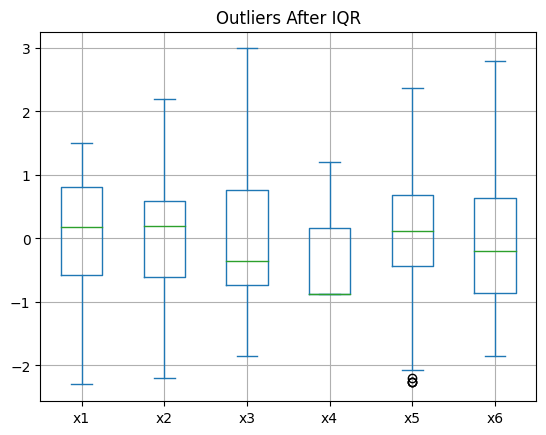

In [14]:
# Pandas dataframe
outliers_rmv = pd.DataFrame({"x1": df['x1'], "x2": df['x2'], "x3": df['x3'], "x4": df['x4'], "x5": df['x5'], "x6": df['x6']})

# Plot the dataframe
ax = outliers_rmv[['x1', 'x2','x3', 'x4','x5', 'x6']].plot(kind='box', title='boxplot',grid=True)

# Display the plot
plt.title('Outliers After IQR')
plt.show()

# Section 2: Benchmarking Classification Models                                                   
Here, we implemented few benchmarking ML models, simple NN and compare their performance. Since the outcome variable is contiuous, we will use regression methods such as linear regressin, decision tree, random forest and gradient boosting methods.


### Split the dataset into 80:20 ratio. 80 % of data will be used for training (and validation), 20 % for test

In [15]:
X = df.drop(columns={'outcome'})
y = df['outcome']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
y_test

46     False
595    False
544     True
734    False
684    False
       ...  
282    False
134    False
252     True
320    False
255    False
Name: outcome, Length: 131, dtype: bool

### 2.0 Neural Network

In [18]:
import tensorflow.keras.backend as K

# Define custom metrics functions
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def r2_score(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - SS_res/(SS_tot + K.epsilon())

model = Sequential()
model.add(Dense(12, input_dim=29, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with the custom metrics
model.compile(loss='mse', optimizer='adam', metrics=[mean_absolute_error, mean_squared_error, r2_score])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=16, batch_size=50)
model.evaluate(X_test, y_test)
y_pred=model.predict(X_test)

# Evaluate the model on the testing dataset
loss, mae, mse, r2 = model.evaluate(X_test, y_test)

print('MAE for NN: ', mae)
print('MSE for NN: ', mse)
print('RMSE for NN: ', np.sqrt(mse))
print('R2 for NN:', r2)


Epoch 1/16
11/11 [==============================] - 1s 25ms/step - loss: 0.2096 - mean_absolute_error: 0.4486 - mean_squared_error: 0.2096 - r2_score: -0.3744 - val_loss: 0.1831 - val_mean_absolute_error: 0.4146 - val_mean_squared_error: 0.1831 - val_r2_score: -0.1454
Epoch 2/16
11/11 [==============================] - 0s 3ms/step - loss: 0.1638 - mean_absolute_error: 0.3880 - mean_squared_error: 0.1638 - r2_score: -0.1144 - val_loss: 0.1398 - val_mean_absolute_error: 0.3482 - val_mean_squared_error: 0.1398 - val_r2_score: 0.1284
Epoch 3/16
11/11 [==============================] - 0s 3ms/step - loss: 0.1255 - mean_absolute_error: 0.3232 - mean_squared_error: 0.1255 - r2_score: 0.1655 - val_loss: 0.1137 - val_mean_absolute_error: 0.2937 - val_mean_squared_error: 0.1137 - val_r2_score: 0.2917
Epoch 4/16
11/11 [==============================] - 0s 3ms/step - loss: 0.1074 - mean_absolute_error: 0.2796 - mean_squared_error: 0.1074 - r2_score: 0.2570 - val_loss: 0.1026 - val_mean_absolute_er

## 2.1 Linear Regression

In [19]:
# Normalize the values using min-max scaler
scaler_x = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

In [20]:
lin_reg = LinearRegression()
# Fit the model to the training set
lin_reg.fit(X_train_scaled, y_train)
# Compute predictions from the test set
y_pred = lin_reg.predict(X_test_scaled).round()
# y_pred = np.where(y_pred_cont >= 0.75, 1, 0)  # apply threshold and convert to binary
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {lin_reg.score(X_test_scaled, y_test)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')

R^2 Test: 0.843011383264711
MSE Test: 0.007633587786259542
RMSE Test: 0.0873704056661038
MAE Test: 0.007633587786259542


C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\2547103457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\2547103457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

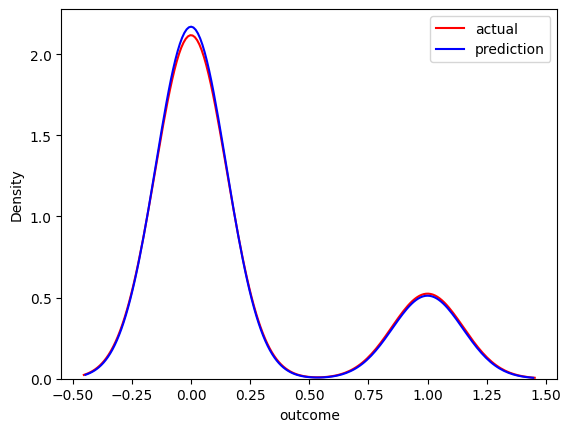

In [21]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("lin_reg.png")
plt.legend()

## 2.2 Decision Tree

In [22]:
clf =DecisionTreeRegressor()

In [23]:
param_dict = {
    'criterion':['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth':[1,2,3,4,5,6,None]
}

In [24]:
grid = GridSearchCV(clf, param_grid= param_dict, cv=10, n_jobs=-1, error_score='raise')

In [25]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]})

In [26]:
grid.best_estimator_

DecisionTreeRegressor()

In [27]:
y_pred = grid.best_estimator_.predict(X_test)
print(f'R^2 Test: {grid.best_estimator_.score(X_test_scaled, y_test)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')

R^2 Test: -0.24761904761904785
MSE Test: 0.007633587786259542
RMSE Test: 0.0873704056661038
MAE Test: 0.007633587786259542


C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## 2.3 Random Forest

In [28]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
               'max_depth': np.arange(5, 41, 5), # Maximum number of levels in tree
               'min_samples_split': [5, 10, 20, 40], # Minimum number of samples required to split a node
               'min_samples_leaf': [2, 6, 12, 24], # Minimum number of samples required at each leaf node
               }

In [29]:
# Instantiate a RandomizedSearchCV on a RandomForestRegressor model with 100 iterations
rfor_reg = RandomizedSearchCV(RandomForestRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

rfor_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40]},
                   verbose=2)

In [30]:
# Check the best parameters found by RandomizedSearchCV
rfor_reg.best_estimator_

RandomForestRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [31]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, rfor_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('y_cfactual', 0.7580033167357288),
 ('y_factual', 0.22254785224822352),
 ('mu0', 0.004527512421821791),
 ('mu1', 0.004093837328256787),
 ('x6', 0.003842084821169786),
 ('x1', 0.002068758354307845),
 ('x5', 0.0009529790732890225),
 ('x12', 0.0009050391712927174),
 ('x13', 0.0007696525755620812),
 ('x3', 0.0006059718595477213),
 ('x2', 0.0003362388628681642),
 ('x8', 0.00020334001385903614),
 ('x4', 0.00019240734393005855),
 ('x10', 0.00019075661901011995),
 ('x20', 0.00018406992769355663),
 ('x19', 0.00016122734893548612),
 ('x7', 0.00016032268057063692),
 ('x16', 0.00014237998411231064),
 ('x25', 5.8513953327331824e-05),
 ('x17', 5.3738676493167514e-05),
 ('x9', 0.0),
 ('x11', 0.0),
 ('x14', 0.0),
 ('x15', 0.0),
 ('x18', 0.0),
 ('x21', 0.0),
 ('x22', 0.0),
 ('x23', 0.0),
 ('x24', 0.0)]

In [32]:
# Compute predictions from the test set
y_pred = rfor_reg.predict(X_test).round()

In [33]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {rfor_reg.score(X_test, y_test)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')

R^2 Test: 0.9606960719749071
MSE Test: 0.007633587786259542
RMSE Test: 0.0873704056661038
MAE Test: 0.007633587786259542


C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\4196100780.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\4196100780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

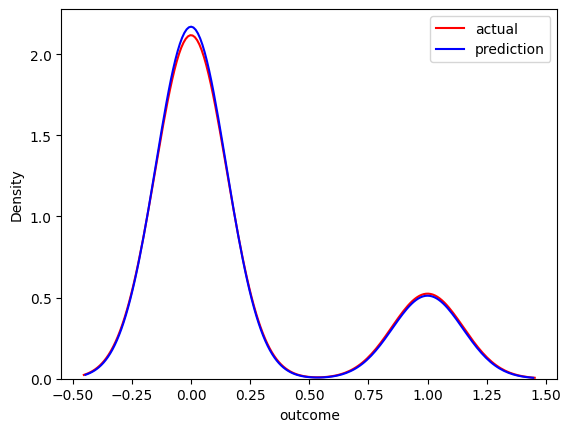

In [34]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("rfor_reg.png")
plt.legend()

## 2.4 Gradient Boosting

In [35]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3],
             "subsample"        : [0.5, 1.0],
             'max_depth'        : np.arange(5, 41, 5),
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [5, 10, 20, 40],
             "min_samples_leaf" : [2, 6, 12, 24]
             }

In [36]:
# Instantiate a RandomizedSearchCV on a GradientBoostingRegressor model with 100 iterations
grad_reg = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

grad_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 6, 12, 24],
                                        'min_samples_split': [5, 10, 20, 40],
                                        'subsample': [0.5, 1.0]},
                   verbose=2)

In [37]:
# Check the best parameters found by RandomizedSearchCV
grad_reg.best_params_

{'subsample': 1.0,
 'min_samples_split': 20,
 'min_samples_leaf': 24,
 'max_features': 'auto',
 'max_depth': 5,
 'learning_rate': 0.1}

In [38]:
# Check the features which are considered as most important in making predictions
sorted(dict(zip(X_train.columns, grad_reg.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('y_cfactual', 0.809097760643014),
 ('y_factual', 0.1782843744031991),
 ('mu0', 0.004758936947136831),
 ('mu1', 0.002794023218630335),
 ('x6', 0.0013321034578587805),
 ('x5', 0.0011865004093175808),
 ('x1', 0.000768823404325137),
 ('x12', 0.000357924936514671),
 ('x14', 0.000345830224711297),
 ('x15', 0.00025639518831539325),
 ('x20', 0.00017342249261031694),
 ('x2', 0.0001429827768543234),
 ('x25', 0.00010987871964078549),
 ('x4', 9.9068164383159e-05),
 ('x7', 8.082776021186646e-05),
 ('x8', 7.892738845293579e-05),
 ('x13', 7.499604548904177e-05),
 ('x3', 4.364604935481554e-05),
 ('x19', 1.3577769979571046e-05),
 ('x9', 0.0),
 ('x10', 0.0),
 ('x11', 0.0),
 ('x16', 0.0),
 ('x17', 0.0),
 ('x18', 0.0),
 ('x21', 0.0),
 ('x22', 0.0),
 ('x23', 0.0),
 ('x24', 0.0)]

In [39]:
# Compute predictions from the test set
y_pred = grad_reg.predict(X_test)

In [40]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {grad_reg.score(X_test, y_test)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')

R^2 Test: 0.9763104091670496
MSE Test: 0.0037685789274491395
RMSE Test: 0.061388752450665905
MAE Test: 0.025486632218302996


C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\1405500827.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\1405500827.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

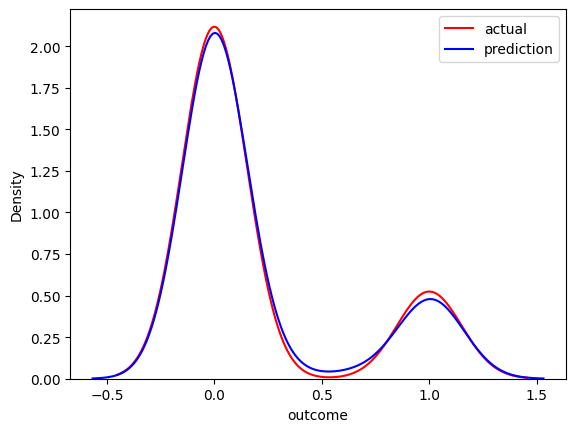

In [41]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("grad_reg.png")
plt.legend()

In [42]:
# Save the model to disk
dump(grad_reg.best_estimator_, 'grad_reg.pkl')

['grad_reg.pkl']

### 2.5: XGBoost

In [43]:
# Hyperparameter values to feed to the RandomizedSearchCV
param_grid = {"learning_rate"   : [0.01, 0.1, 0.3] ,
             'max_depth'        : np.arange(5, 41, 5),
             "min_child_weight" : [1, 3, 5, 7],
             "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
             "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
             }

In [44]:
# Instantiate a RandomizedSearchCV on an XGBRegressor model with 100 iterations
xgb_reg = RandomizedSearchCV(XGBRegressor(), param_distributions = param_grid, n_iter = 100, verbose = 2, n_jobs = -1)

xgb_reg.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40]),
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=2)

In [45]:
# Best parameters
xgb_reg.best_params_

{'min_child_weight': 1,
 'max_depth': 35,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [46]:
# Check the number of times a feature was used to split the data across all trees
sorted(xgb_reg.best_estimator_.get_booster().get_score(importance_type='weight').items(), key=lambda x: x[1], reverse=True)

[('y_factual', 21.0),
 ('y_cfactual', 15.0),
 ('mu0', 6.0),
 ('x1', 2.0),
 ('x6', 2.0),
 ('x4', 1.0),
 ('x24', 1.0)]

In [47]:
# Compute predictions from the test set
y_pred = xgb_reg.predict(X_test)

In [48]:
# Coefficient of determination (R^2) on the test set
print(f'R^2 Test: {xgb_reg.score(X_test, y_test)}')
print(f'MSE Test: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE Test: {mean_absolute_error(y_test, y_pred)}')

R^2 Test: 0.960762527262041
MSE Test: 0.006241962313652039
RMSE Test: 0.07900609076023102
MAE Test: 0.022327778860926628


C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\1567784925.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
C:\Users\Sharmin_Sultana\AppData\Local\Temp\ipykernel_20296\1567784925.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

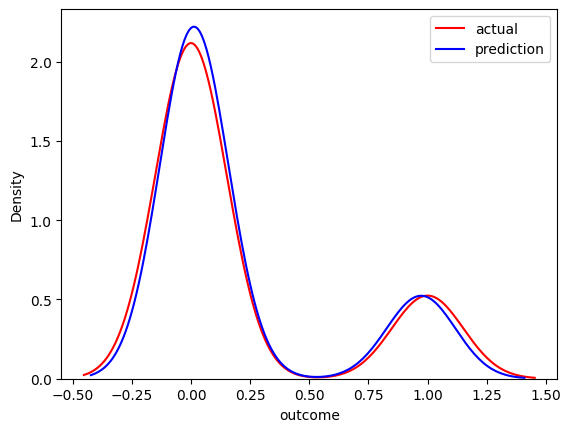

In [49]:
# Visualize the predictions (in blue) against the actual values (in red)
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)

# Save the figure to a file
sns_plot.get_figure().savefig("xgb_reg.png")
plt.legend()

# Section 3: Causal Model

In [50]:
import dowhy
from dowhy import CausalModel

C:\Users\Sharmin_Sultana\Anaconda3\envs\machine_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:

# Create a causal model from the data and the "x" variables as common causes.
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")

model=CausalModel(
        data = df,
        outcome='outcome',
        treatment='y_factual',
        common_causes=xs.split('+')
        )
 
#Identify the causal effect
identified_estimand = model.identify_effect()

data_1 = df[df["outcome"]==1]
data_0 = df[df["outcome"]==0]
print("ATE", np.mean(data_1["y_factual"])- np.mean(data_0["y_factual"]))

estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")

print("Causal Estimate is " + str(estimate.value))

ATE 4.150702380695559
Causal Estimate is None
